In [39]:
#  importing the required libraries for the model
import numpy as np
import pandas as pd
# importing thr data
df=pd.read_csv("/Users/shobh/ML_Project/NSE-TATAGLOBAL.csv")

In [47]:
rows = df.values.tolist()

x_train = []
y_train = []
x_test = []
y_test = []
X = []
Y = []
# Adding Date as integer in X and closing value of stocks in Y
for row in rows:
    X.append(int(''.join(row[0].split('-')))) 
    Y.append(row[5])                            
max1=max(Y)
min1=min(Y)
for i in range(0,len(Y)):
      Y[i]=(Y[i]-max1)/(max1-min1)    

# Splitting the data into training and testing
x_train=X[:800]
x_test=X[800:]
y_train=Y[:800]
y_test=Y[800:]

# converting the colummns to mathematical arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [48]:
# implementing SVR model
from sklearn.svm import SVR
clf_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf_svr.fit(x_train,y_train)
y_pred_svr = clf_svr.predict(x_test)

In [49]:
# implementing LR model
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)

In [50]:
# implementing Random Forest Model
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)

In [67]:
x=({'test':y_test,'rf_val_pred':y_pred_rf,'svr_val_pred':y_pred_svr,'lr_val_pred':y_pred_lr})
l=len(x['test'])


test_val=[];
rf_pred_val=[];
svr_pred_val=[];
lr_pred_val=[];

# Finding the trend by using values from test_values and predicted_values for different models
for i in range (l-1):
        if i==0:
            test_val.append('z')
        else:
            if x['test'][i+1]>=x['test'][i]:
                test_val.append(1)
            else:
                test_val.append(0)
            
for i in range (l-1):
        if i==0:
            rf_pred_val.append('z')
        else:
            if x['rf_val_pred'][i+1]>=x['rf_val_pred'][i]:
                rf_pred_val.append(1)
            else:
                rf_pred_val.append(0)  
                
for i in range (l-1):
        if i==0:
            svr_pred_val.append('z')
        else:
            if x['svr_val_pred'][i+1]>=x['svr_val_pred'][i]:
                svr_pred_val.append(1)
            else:
                svr_pred_val.append(0)   
                

for i in range (l-1):
        if i==0:
            lr_pred_val.append('z')
        else:
            if x['lr_val_pred'][i+1]>=x['lr_val_pred'][i]:
                lr_pred_val.append(1)
            else:
                lr_pred_val.append(0)     

p=0
for i in range (l-1):
    if test_val[i]==rf_pred_val[i]:
        p+=1

n=0
for i in range (l-1):
    if test_val[i]==svr_pred_val[i]:
        n+=1
        
q=0
for i in range(l-1):
    if test_val[i]==lr_pred_val[i]:
        q+=1

print(l,p,n,q)



435 216 221 210


In [71]:

# Calculating the percentage for correct trends across different models
print("Trend percentage for Random Forest:",(p/l)*100)
print("Trend percentage for SVR: ",(n/l)*100)
print("Trend percentage for Linear Regression :",(q/l)*100)

    

Trend percentage for Random Forest: 49.6551724137931
Trend percentage for SVR:  50.804597701149426
Trend percentage for Linear Regression : 48.275862068965516


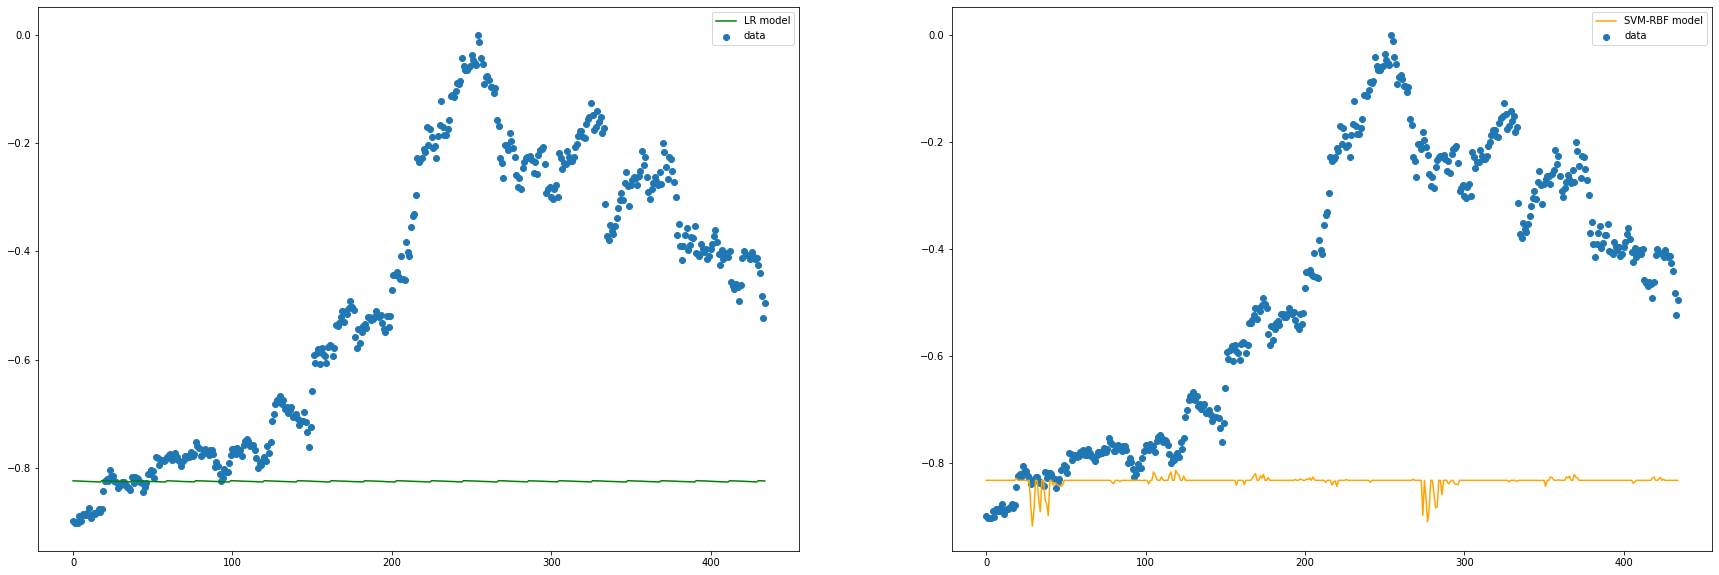

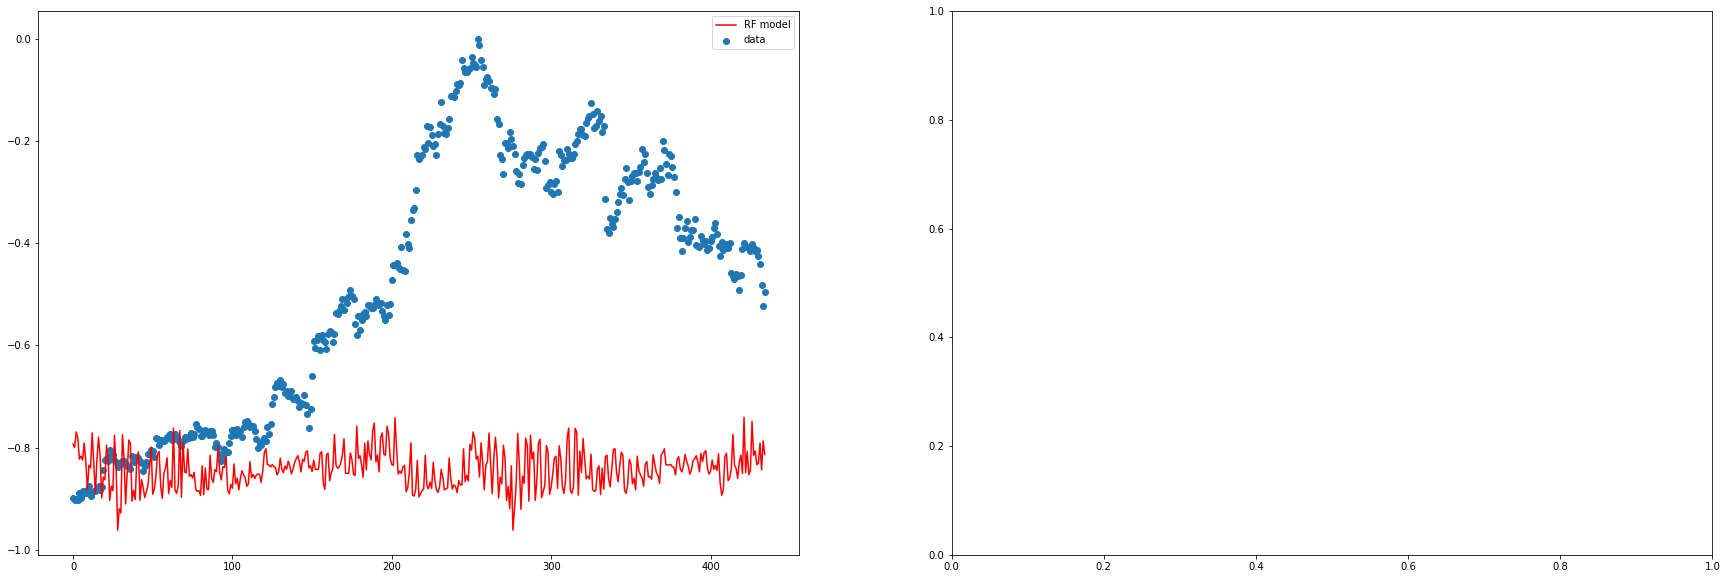

In [51]:

#plotting the graphs for predicted and tested values for all three models

import matplotlib.pyplot as plt


f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

# Linear Regression
ax1.scatter(range(len(y_test)),y_test,label='data')
ax1.plot(range(len(y_test)),y_pred_lr,color='green',label='LR model')
ax1.legend()

# Support Vector Machine
ax2.scatter(range(len(y_test)),y_test,label='data')
ax2.plot(range(len(y_test)),y_pred_svr,color='orange',label='SVM-RBF model')
ax2.legend()

f1,(ax3,ax4) = plt.subplots(1,2,figsize=(30,10))

# Random Forest Regressor
ax3.scatter(range(len(y_test)),y_test,label='data')
ax3.plot(range(len(y_test)),y_pred_rf,color='red',label='RF model')
ax3.legend()

In [72]:
print("Accuracy of Linear Regerssion Model for test data:",clf_lr.score(x_test,y_test))
print("Accuracy of SVM-RBF Model for test data:",clf_svr.score(x_test,y_test))
print("Accuracy of Random Forest Model for test data:",clf_rf.score(x_test,y_test))

Accuracy of Linear Regerssion Model for test data: -1.7897959899297353
Accuracy of SVM-RBF Model for test data: -1.8748120313217678
Accuracy of Random Forest Model for test data: -1.9844039706703707


In [73]:
print("Accuracy of Linear Regerssion Model for train data:",clf_lr.score(x_train,y_train))
print("Accuracy of SVM-RBF Model for train data:",clf_svr.score(x_train,y_train))
print("Accuracy of Random Forest Model for train data :",clf_rf.score(x_train,y_train))    

Accuracy of Linear Regerssion Model for train data: 0.00011849609823744167
Accuracy of SVM-RBF Model for train data: 0.07552241400294402
Accuracy of Random Forest Model for train data : 0.667341136893099
